<a href="https://colab.research.google.com/github/LuisAlfredo-Campos/Prediccion-de-Ventas/blob/main/proyecto1_predcciondeventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##proyecto1_predcciondeventas

1) ¿Cuántas filas y columnas?

2) ¿Cuáles son los tipos de datos en cada variable?

3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

4) Identifiquen los valores faltantes.

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

6) Confirmen que no hay valores faltantes después de abordarlos.

7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

9) - Histograma para ver las distribuciones de diversas características en el conjunto de datos.

  - Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

  - Mapa de calor de la correlación entre las características.
 

In [130]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA SET/sales_predictions.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


#1) ¿Cuántas filas y columnas?

In [131]:
N_columns = df.columns
len(df.index) #para concer el numero exacto de columnas y filas 


8523

In [132]:
df.shape         #numero de filas y columnas 

(8523, 12)

son columnas = 12
     filas   = 8523

#2) ¿Cuáles son los tipos de datos en cada variable?

In [133]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

hay solo 2 tipos de datos object , float64 y un dato integer 





#3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [134]:
df.duplicated() #con esta funcion o metodo conocemos si hay dufloicado entrega un booleano false cundo mo de se repite pero cuendo se repite un bool true 
        

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [135]:
df.duplicated().sum() # con el metodo sum() cionocemos el total de los datos duplicados 

0

no tenemos duplicados .

#4) Identifiquen los valores faltantes.

In [136]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

en el Item_Weight(peso.art) faltan 1463 datos y Outlet_Size(tamaño.out) faltan 2410 datos 





#5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [137]:
# ya que son tantos los datos faltantes ,los renplasare con los las medias de los datos existentes , y los usare para algunos analizes 
# en el caso la columna Outlet_Size LAS QUITARE  segun sea el requeriemnto ya qure al ser datos categoricos como el tamaño  de la tienda a mi criterio solo puede ser usado en algunos analic
media_weight = df[['Item_Weight']].median()
df['Item_Weight'].fillna(media_weight , inplace =True)
media_weight.head(5)

Item_Weight    12.6
dtype: float64

In [138]:
df = df.drop(columns= ['Outlet_Size',]) #se elimna la columna que por el momento tiene muchos datos faltantes 
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


#6) Confirmen que no hay valores faltantes después de abordarlos.

In [139]:
media_weight.isna().sum()# ya no hay datos faltantes en esta columna 

0

#7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [140]:
df.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type     Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600       LF                0.000000         Soft Drinks   141.9154  OUT035             2004                       Tier 2                Supermarket Type1  992.7078             1
FDV25            5.905        Low Fat           0.045838         Canned        222.5456  OUT018             2009                       Tier 3                Supermarket Type2  3315.6840            1
FDV28            16.100       Regular           0.159595         Frozen Foods  32.8558   OUT013             1987                       Tier 3                Supermarket Type1  339.5580             1
                                                0.000000         Frozen Foods  35.1558   OUT017             2007                       Tier 2                Supermarket Type1  339.5580             1
FDV27     

In [141]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [142]:
#remplase los datos por un dato categorico uniforme 
df['Item_Fat_Content']= df['Item_Fat_Content'].replace({'Low Fat':'low fat','LF':'low fat','reg':'Regular'}) 
df['Item_Fat_Content'].value_counts()

low fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [143]:
df.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type     Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600       low fat           0.000000         Soft Drinks   141.6154  OUT045             2002                       Tier 2                Supermarket Type1  3829.0158            1
FDV25            5.905        low fat           0.045723         Canned        222.1456  OUT049             1999                       Tier 1                Supermarket Type1  5747.1856            1
FDV28            16.100       Regular           0.159595         Frozen Foods  32.8558   OUT013             1987                       Tier 3                Supermarket Type1  339.5580             1
                                                0.000000         Frozen Foods  35.1558   OUT017             2007                       Tier 2                Supermarket Type1  339.5580             1
FDV27     

#8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [144]:
df.describe()# 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# 9) - Histograma para ver las distribuciones de diversas características en el conjunto de datos.

  - Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

  - Mapa de calor de la correlación entre las características.
 

 ##- Histograma para ver las distribuciones de diversas características en el conjunto de datos.

In [145]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [146]:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA SET/sales_predictions.csv')
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

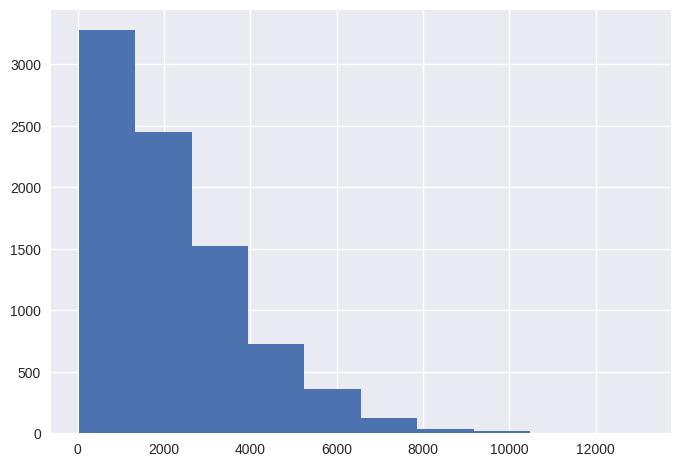

In [147]:
df['Item_Outlet_Sales'].hist()

aca podemos ver el analices de dos v arinatees en el mismo grafico 


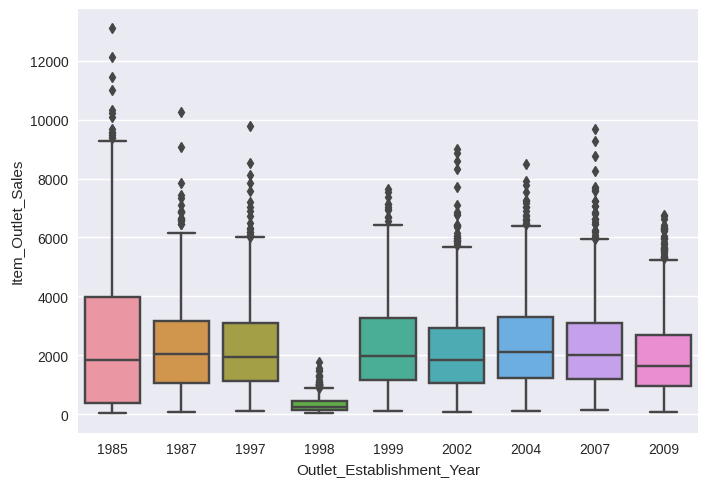

In [148]:
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df)
print('aca podemos ver el analices de dos v arinatees en el mismo grafico ')

Mapa de calor de la correlación entre las características.

<Axes: >

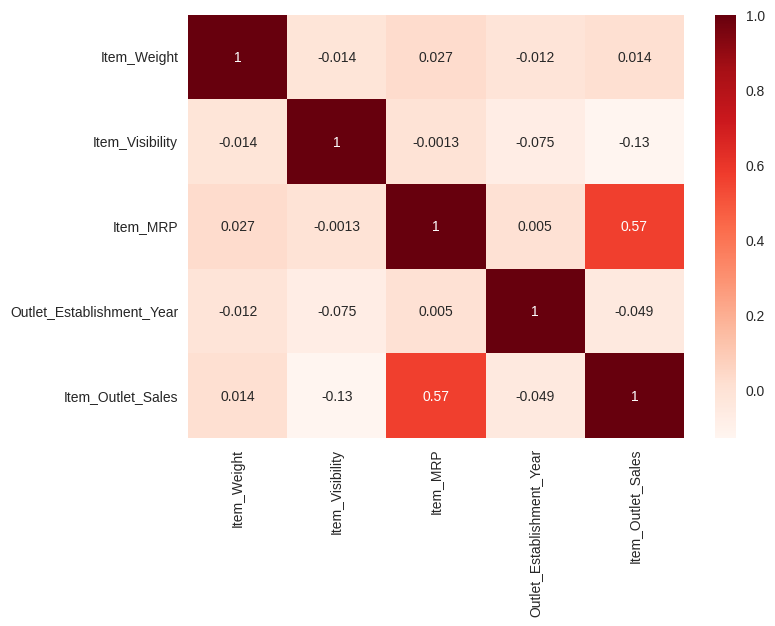

In [149]:

sns.heatmap(corr, cmap = 'Reds',annot = True)

#Buscare poner dos grapicos donde desmostrare la inter relacion de dos datos en las columnas de este Data Set de prediccion de ventas 


In [150]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA SET/sales_predictions.csv')
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


este grafico muestrqa clara mente que el peso de producto asciado a los costos de este mismo han ido subiendo a lo largo del tiempo 

In [151]:
ventas_promedio  =df['Item_Outlet_Sales'].describe().values
ventas_promedio


array([ 8523.        ,  2181.28891358,  1706.49961573,    33.29      ,
         834.2474    ,  1794.331     ,  3101.2964    , 13086.9648    ])

In [152]:
año = df['Outlet_Establishment_Year'].describe()
año

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [153]:
# Create filter for model with intercept



<ipython-input-154-8207e1deb42e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


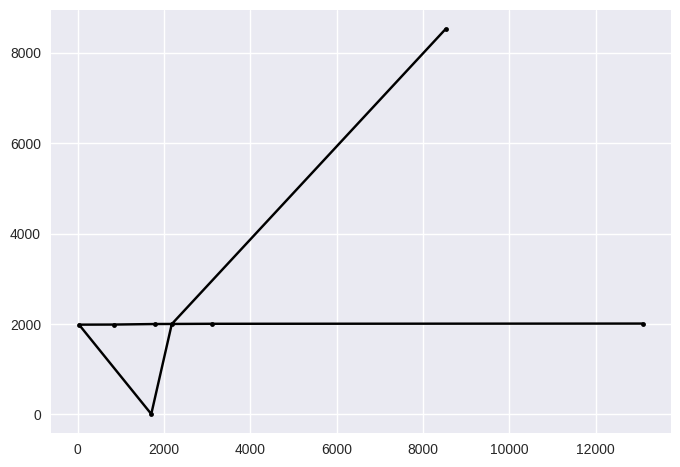

In [154]:
plt.style.use('seaborn')
plt.plot(ventas,año, marker = '.', c= 'k')


In [155]:

nunique_año= df.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].nunique()

In [156]:
uniqueYears = list(numberUniqueYear.index)
uniqueYears


[1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009]

In [157]:
numOlympian = list(numberUniqueYear.values)
numOlympian


[1183, 788, 778, 391, 785, 776, 806, 777, 779]

<ipython-input-177-ab70ddc4e777>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


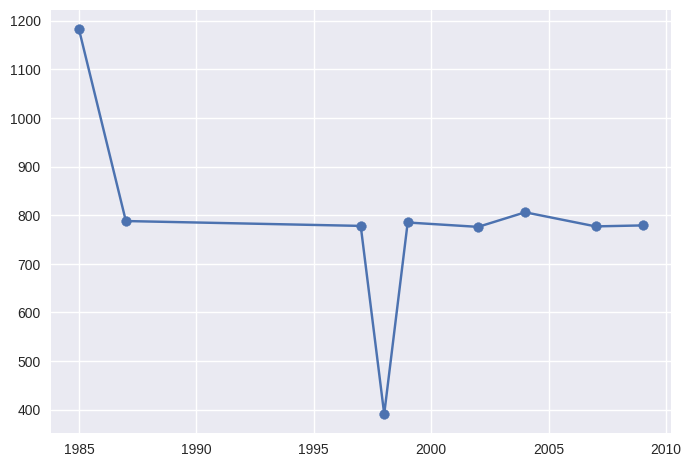

In [177]:
plt.style.use('seaborn')

plt.plot(uniqueYears, numOlympian,marker='.')
plt.scatter(uniqueYears, numOlympian)

In [178]:
# Create filter for model with intercept
sales_Filter = df['Item_Fat_Content'] == 'Fat'
df_sales= df.loc[sales_Filter, :]
df_nosales = df.loc[~sales_Filter, :]


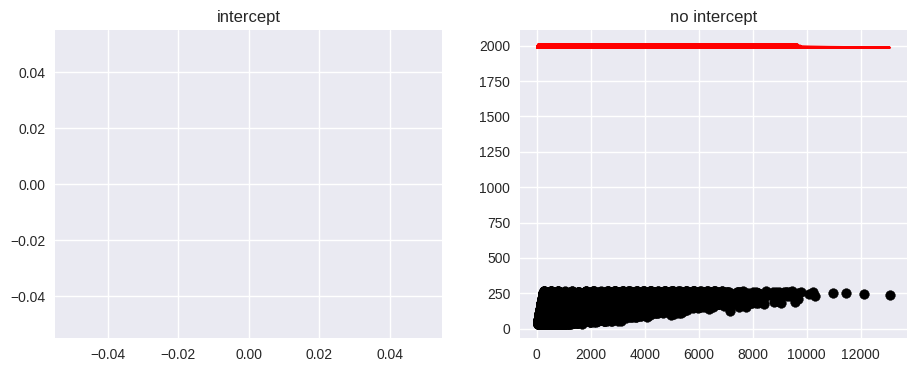

In [179]:
# Play with this code and see what happens!
# Adjust size of figure
plt.figure(figsize=(11,4))
# Subplot 1 
plt.subplot(1, 2, 1);
plt.plot(df_sales['Item_Outlet_Sales'].values, df_sales['Outlet_Establishment_Year'].values, c = 'r');
plt.scatter(df_sales['Item_Outlet_Sales'].values, df_sales['Item_MRP'].values, c= 'k');
plt.title('intercept', fontsize = 12);
# Subplot 2
plt.subplot(1, 2, 2);
plt.plot(df_nosales['Item_Outlet_Sales'].values, df_nosales['Outlet_Establishment_Year'].values, c = 'r');
plt.scatter(df_nosales['Item_Outlet_Sales'].values, df_nosales['Item_MRP'].values, c= 'k');
plt.title('no intercept', fontsize = 12);
